<a href="https://colab.research.google.com/github/karthebans/Research/blob/main/RNN_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np

In [34]:
def generate_time_series(batch_size,n_steps):
    freq1, freq2, offset1, offset2, = np.random.rand(4,batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5 * np.sin((time-offset1) * (freq1 * 10 + 10))
    series +=0.2 * np.sin((time - offset2) * (freq2 *20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [17]:
n_steps = 50
series = generate_time_series(10000, n_steps +1)
series

array([[[-0.54533035],
        [-0.3996726 ],
        [-0.22606987],
        ...,
        [-0.19724712],
        [-0.40488192],
        [-0.53282756]],

       [[ 0.3056186 ],
        [ 0.4003793 ],
        [ 0.510774  ],
        ...,
        [ 0.18942614],
        [ 0.1407173 ],
        [ 0.0734825 ]],

       [[ 0.11527731],
        [-0.15259919],
        [-0.3420273 ],
        ...,
        [ 0.09055861],
        [-0.02715979],
        [-0.19743623]],

       ...,

       [[ 0.42142615],
        [ 0.24433033],
        [ 0.12374406],
        ...,
        [ 0.28446057],
        [ 0.34511817],
        [ 0.28502357]],

       [[-0.35891268],
        [-0.12081373],
        [ 0.11480688],
        ...,
        [-0.63869727],
        [-0.54450625],
        [-0.26703048]],

       [[ 0.6441406 ],
        [ 0.5917992 ],
        [ 0.4523631 ],
        ...,
        [-0.3469636 ],
        [-0.24242242],
        [-0.31561497]]], dtype=float32)

In [18]:
series[0][0]

array([-0.54533035], dtype=float32)

In [19]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]

In [ ]:
X_train

In [21]:
y_train

array([[-0.53282756],
       [ 0.0734825 ],
       [-0.19743623],
       ...,
       [-0.60098857],
       [-0.09373744],
       [ 0.01936147]], dtype=float32)

In [22]:
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000,-1]

In [9]:
x_test, y_test = series[9000: , :n_steps], series[9000:,-1]

In [ ]:
x_test

In [ ]:
y_test

In [23]:
import keras

In [24]:
y_pred = x_valid[:,-1]

In [25]:
y_pred

array([[-0.28823906],
       [ 0.2669238 ],
       [-0.26998785],
       ...,
       [ 0.08451651],
       [ 0.04933338],
       [-0.31202528]], dtype=float32)

In [26]:
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

0.020941718

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [50,1]),
    keras.layers.Dense(1)
])

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/Electric_Production.csv')

In [4]:
df.columns = ['date','value']

In [5]:
df.head()

,date,value
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [7]:
y = df.value.values

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [16]:
# How many record to take into account
length = 2

batch_size = 1

# 1 beacause it's univariate
n_features = 1

In [17]:
generator = TimeseriesGenerator(y, y, stride=3, length=length, batch_size=batch_size)


In [58]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss="mse")
model.fit(generator, epochs=10)

Epoch 1/10
132/132 [==============================] - 1s 4ms/step - loss: 531.1826
Epoch 2/10
132/132 [==============================] - 1s 4ms/step - loss: 134.7888
Epoch 3/10
132/132 [==============================] - 1s 4ms/step - loss: 132.4632
Epoch 4/10
132/132 [==============================] - 1s 4ms/step - loss: 129.5249
Epoch 5/10
132/132 [==============================] - 1s 4ms/step - loss: 140.6339
Epoch 6/10
132/132 [==============================] - 1s 4ms/step - loss: 131.7308
Epoch 7/10
132/132 [==============================] - 1s 4ms/step - loss: 110.1561
Epoch 8/10
132/132 [==============================] - 1s 4ms/step - loss: 133.9163
Epoch 9/10
132/132 [==============================] - 1s 4ms/step - loss: 132.3153
Epoch 10/10
132/132 [==============================] - 1s 4ms/step - loss: 132.1491


In [59]:
model.save('model.h5')

In [60]:
pred = model.predict(generator)

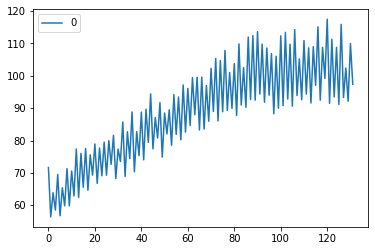

In [62]:
pd.DataFrame(pred).plot()

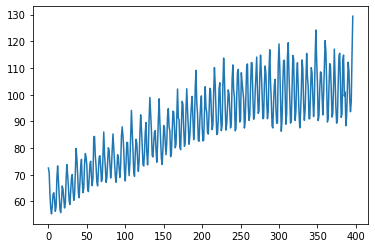

In [63]:
df.value.plot()

In [73]:
y_new = y.reshape(1,397,1)
x_new = y_new[:, :2]

In [75]:
x_new

array([[[72.5052],
        [70.672 ]]])

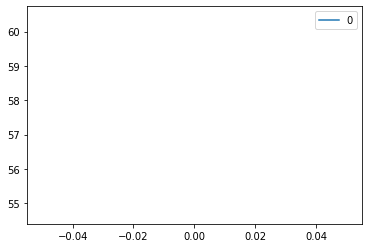

In [76]:
for step_ahead in range(50):
    y_pred_one = model.predict(x_new[:, step_ahead:])[:, np.newaxis, :]
    x_new = np.concatenate([x_new, y_pred_one], axis=1)

y_pred = x[:, 2:]
pd.DataFrame(y_pred.reshape(1,-1)[0]).plot()

In [77]:
y_pred

array([[[57.56933212]]])

In [38]:
n_steps = 10
s = generate_time_series(1, n_steps + 10)

In [39]:
s.shape

(1, 20, 1)

In [65]:
y = y.reshape(1,397,1)

In [66]:
y.shape

(1, 397, 1)

In [79]:
y

array([[[ 72.5052],
        [ 70.672 ],
        [ 62.4502],
        [ 57.4714],
        [ 55.3151],
        [ 58.0904],
        [ 62.6202],
        [ 63.2485],
        [ 60.5846],
        [ 56.3154],
        [ 58.0005],
        [ 68.7145],
        [ 73.3057],
        [ 67.9869],
        [ 62.2221],
        [ 57.0329],
        [ 55.8137],
        [ 59.9005],
        [ 65.7655],
        [ 64.4816],
        [ 61.0005],
        [ 57.5322],
        [ 59.3417],
        [ 68.1354],
        [ 73.8152],
        [ 70.062 ],
        [ 65.61  ],
        [ 60.1586],
        [ 58.8734],
        [ 63.8918],
        [ 68.8694],
        [ 70.0669],
        [ 64.1151],
        [ 60.3789],
        [ 62.4643],
        [ 70.5777],
        [ 79.8703],
        [ 76.1622],
        [ 70.2928],
        [ 63.2384],
        [ 61.4065],
        [ 67.1097],
        [ 72.9816],
        [ 75.7655],
        [ 67.5152],
        [ 63.2832],
        [ 65.1078],
        [ 73.8631],
        [ 77.9188],
        [ 76.6822],


In [87]:
y[:, 2::2].shape

(1, 198, 1)

In [1]:

#Importing Libraries
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(len(sequence)):
    # define the end index of the sequence
    end_index = start + steps
    # to check if end_index stays in the allowable limit
    if end_index > len(sequence)-1:
      break
    # extract input and output parts of the sequence
    sequence_x, sequence_y = sequence[start : end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)

In [3]:
raw_sequence = [100, 110, 120, 130, 140, 150 ,160, 170, 180 ,190]

# choose a number of time steps
steps = 3

# split into samples
X, y = split_sequence(raw_sequence, steps)

print("**************************************************************")
print("The input raw sequence on which we will test our CNN model")
print(raw_sequence)
print("**************************************************************")
print("The features (X) ,lagged values of time series, for our CNN model")
print(X)
print("**************************************************************")
print("The respective observed values (y) of the sequence for training in CNN model")
print(y)
print("**************************************************************")

**************************************************************
The input raw sequence on which we will test our CNN model
[100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
**************************************************************
The features (X) ,lagged values of time series, for our CNN model
[[100 110 120]
 [110 120 130]
 [120 130 140]
 [130 140 150]
 [140 150 160]
 [150 160 170]
 [160 170 180]]
**************************************************************
The respective observed values (y) of the sequence for training in CNN model
[130 140 150 160 170 180 190]
**************************************************************


In [4]:
# reshape 2D input data to 3D input data
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("After reshaping , the shape of input X")
print(X.shape)
print("**************************************************************")
print("**************************************************************")
print("The final form of input feature matrix X")
print(X)
print("**************************************************************")
print("**************************************************************")
print("Feature matrix X is ready for input to CNN model.We have used feature engineering" 
    +"to convert a sequence to matrix with image matrix shape to find patterns in sequence")
print("**************************************************************")

After reshaping , the shape of input X
(7, 3, 1)
**************************************************************
**************************************************************
The final form of input feature matrix X
[[[100]
  [110]
  [120]]

 [[110]
  [120]
  [130]]

 [[120]
  [130]
  [140]]

 [[130]
  [140]
  [150]]

 [[140]
  [150]
  [160]]

 [[150]
  [160]
  [170]]

 [[160]
  [170]
  [180]]]
**************************************************************
**************************************************************
Feature matrix X is ready for input to CNN model.We have used feature engineeringto convert a sequence to matrix with image matrix shape to find patterns in sequence
**************************************************************


In [5]:
# Defining model Architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [9]:
# fit model
model.fit(X, y, epochs=7000, verbose=1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 1.5495
Epoch 4502/7000
1/1 [==============================] - 0s 13ms/step - loss: 1.5486
Epoch 4503/7000
1/1 [==============================] - 0s 10ms/step - loss: 1.5476
Epoch 4504/7000
1/1 [==============================] - 0s 9ms/step - loss: 1.5466
Epoch 4505/7000
1/1 [==============================] - 0s 10ms/step - loss: 1.5456
Epoch 4506/7000
1/1 [==============================] - 0s 9ms/step - loss: 1.5446
Epoch 4507/7000
1/1 [==============================] - 0s 9ms/step - loss: 1.5437
Epoch 4508/7000
1/1 [==============================] - 0s 11ms/step - loss: 1.5427
Epoch 4509/7000
1/1 [==============================] - 0s 141ms/step - loss: 1.5417
Epoch 4510/7000
1/1 [==============================] - 0s 8ms/step - loss: 1.5407
Epoch 4511/7000
1/1 [==============================] - 0s 6ms/step - loss: 1.5397
Epoch 4512/7000
1/1 [==============================] - 0s

In [10]:
#Testing the Model
x_input = array([ 170, 180, 190 ])
x_input = x_input.reshape((1, steps, features))
y_pred = model.predict(x_input, verbose=0)
print("**************************************************************")
print(f"The next predicted value for the sequence {raw_sequence} is")
print(y_pred)
print("**************************************************************")

**************************************************************
The next predicted value for the sequence [100, 110, 120, 130, 140, 150, 160, 170, 180, 190] is
[[199.99931]]
**************************************************************


In [12]:
x_input.shape

(1, 3, 1)

In [13]:
x = array([1,2,3])

In [26]:
x = np.insert(x,x[-1],4)

In [31]:
x[1:]

array([2, 3, 4])